# **Descricpción General del Proyecto**


En esta mentoría se propone analizar los datos provenientes de una de las Áreas de Negocio de la Empresa para la cual trabajo. Hablamos de su Red de Telecomunicaciones a nivel provincial. La misma, está compuesta por la Infraestructura de la Red de Telecomunicaciones propiamente dicha, la cual abarca la Red Teleoperación e Interconexión de Estaciones Eléctricas, la Red de Telemedición y Transporte de Datos, Red de Infraestructura de TI, Red de Protección del Tendido Eléctrico y la Red para Provisión/Comercialización de Internet Corporativo. 


Cabe aclarar que físicamente se trata de la misma Red. La Fibra Óptica instalada permite todos estas aplicaciones y usos, al igual que sus radioenlaces de alta capacidad. Dicha fibra nos brinda mayor fiabilidad, alta resistencia a las inclemencias del tiempo, dimensiones y pesos reducidos, velocidad en la transmisión ilimitada, pero su despliegue es más lento y costoso. Los enlaces de radiofrecuencia son más económicos, su despliegue es más dinámico, pero sus alcances en cuanto a anchos de banda son limitados. Cualquiera fuere el medio, esta red debe estar bajo estudio constante a fin de evitar fallas o anomalías. 
En esta tutoría se propone:
* Análisis de Trafico de la red, para detectar comportamientos sospechosos en función de garantizar la seguridad de los Sistemas que la usan y de la propia Red.
* Utilización y capacidad de la Red.
* Predicción de consumo, cortes, saturación y desperfectos en la Red para analizar ampliaciones y/o modificaciones en la Infraestructura actual.


Trataremos de responder algunas de las siguientes preguntas:
* ¿Es posible predecir cortes o desperfectos en la Red?
* ¿Podemos predecir el uso de la Red en las próximas 24 horas? ¿En la próxima semana?
* ¿Es posible detectar anomalías o comportamientos sospechosos en el tráfico de la Red?
* ¿La actividad de la Red varía según el día de la semana o mes? 
* ¿Los cortes en la Red están asociados con alguna otra/s variable/s del set de datos?

# **Practico Mentoria - Analisis y Visualizacion de Datos**


Se propone la elaboración de un informe o presentación, en formato estatico:
* PDF
* Markdowns
* Google Docs

Que responda a las cuestiones solicitadas en cada seccion de esta **Jupyter Notebook**.

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.  
Por lo cual debe estar redactado de forma consisa y comprensible.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import scipy
from scipy import stats
from datetime import date
from datetime import datetime

In [3]:
pd.options.display.float_format = '{:.4f}'.format

##  **1. Análisis General**

Durante esta mentoria vamos a trabajar sobre el dataset [Información Datos Infraestructura Telecomunicaciones]('file:///C://Personales//Estudios//CienciadeDatos//Diplo//Mentoria//Introduccion_Mentoria//dataset_inf_telec.csv').

In [82]:
dataset = pd.read_csv(
    'https://raw.githubusercontent.com/diplodatos2020/Introduccion_Mentoria/master/dataset_inf_telec.csv', 
    parse_dates=["FECHA_INICIO_MEDICION","FECHA_HORA","FECHA_FIN_MEDICION"])

np.random.seed(0)
dataset.sample(15)

,ID_EQUIPO,PUNTO_MEDICION,CAPACIDAD_MAXIMA_GBS,FECHA_INICIO_MEDICION,FECHA_HORA,FECHA_FIN_MEDICION,PASO,LATENCIA_MS,PORCENTAJE_PACK_LOSS,INBOUND_GBPS,OUTBOUND_GBPS
9517,4,NOC - S9306 to SS6720HI,1.0000,2020-05-28 14:00:00,2020-05-30 21:00:00,2020-06-04 14:00:00,1800,2.8114,0.0000,3690123776.0000,58855821312.0000
7265,62,NOC - 6720HI to RPrivado,1.0000,2020-05-28 14:00:00,2020-06-01 23:00:00,2020-06-04 14:00:00,1800,0.3695,0.0000,16305902.0000,15862084.0000
13603,11,SF - Freyre,10.0000,2020-05-28 15:00:00,2020-06-01 01:00:00,2020-06-04 15:00:00,1800,6.5764,0.0000,1141391616.0000,17407084544.0000
14185,11,SF - Las Varillas,1.0000,2020-05-28 15:00:00,2020-05-30 04:00:00,2020-06-04 15:00:00,1800,6.5161,0.0770,68260712.0000,317487072.0000
13283,31,RDB - RIO,10.0000,2020-05-28 15:00:00,2020-06-01 09:00:00,2020-06-04 15:00:00,1800,6.5498,0.5011,1243443200.0000,10368447488.0000
14490,11,SF - SF Adm,1.0000,2020-05-28 15:00:00,2020-05-29 12:30:00,2020-06-04 15:00:00,1800,6.8690,0.0491,1517869.7500,14750459.0000
9928,4,NOC - SW Clientes 1,1.0000,2020-05-28 14:00:00,2020-06-01 10:30:00,2020-06-04 14:00:00,1800,1.4890,0.2636,169669360.0000,180047024.0000
14406,11,SF - Las Varillas,1.0000,2020-05-28 15:00:00,2020-06-03 18:30:00,2020-06-04 15:00:00,1800,6.5949,0.0000,129967112.0000,1042762944.0000
15036,11,SF - SF Cliente,1.0000,2020-05-28 15:00:00,2020-06-02 21:30:00,2020-06-04 15:00:00,1800,5.9062,0.2154,13617836.0000,30109000.0000
7051,62,NOC - 6720HI to R4 Silica,1.0000,2020-05-28 14:00:00,2020-06-04 12:00:00,2020-06-04 14:00:00,1800,0.5797,0.0000,161347456.0000,2849490432.0000


### 1.1 ¿Cuántas *features* posee el dataset? ¿Que representa cada una?

In [83]:
dataset.nunique()

ID_EQUIPO                   10
PUNTO_MEDICION              48
CAPACIDAD_MAXIMA_GBS         8
FECHA_INICIO_MEDICION        4
FECHA_HORA                 340
FECHA_FIN_MEDICION           4
PASO                         1
LATENCIA_MS              15993
PORCENTAJE_PACK_LOSS      6278
INBOUND_GBPS             15956
OUTBOUND_GBPS            16078
dtype: int64

Las variables más importantes sobre las que trabaja el dataset son:

* `ID_EQUIPO` : 
  
  Switch al cual se conectan cada uno de los puntos de medición (troncales).
  identificadores unicos por dispositivo y para este dataset existen solo 10
  dispositivos diferentes.

* `PUNTO_MEDICION` : 

  Representan los distintos tramos troncales de la red de telecomunicaciones.
  Variables unicas, y para el dataset existen 48 datos distintos.

* `CAPACIDAD_MAXIMA_GBS` : 

  Capacidad en gigabits lógica que tiene el troncal para prestar el servicio
  de manera eficiente. Variable discreta fija asociada al dispositivo.

  **NOTA** De las dos primeras variables existe la relacion tal que cada
  `PUNTO_MEDICION` corresponde a un puerto de un `ID_EQUIPO` especifico. Por otro lado
  cada `PUNTO_MEDICION` (puerto) tiene asociada una `CAPACIDAD_MAXIMA_GBS` de acuerdo a la capacidad del equipo. Y cada 
  dispositivo puede tener puertos de distintas capacidades. Por ejemplo el equipo
  4 tiene 9 puertos de 1 GBS, el equipo 11 tiene 3 puertos de 1 GBS y 2 de 
  10 GBS, y asi. Tal como se obserba en la Siguiente tabla.   

In [84]:
cols = ['ID_EQUIPO', 'CAPACIDAD_MAXIMA_GBS', 'PUNTO_MEDICION']
res = dataset[cols].drop_duplicates().sort_values(by='ID_EQUIPO')
res.groupby(['ID_EQUIPO', 'CAPACIDAD_MAXIMA_GBS']).count()

PUNTO_MEDICION
ID_EQUIPO CAPACIDAD_MAXIMA_GBS                
4         1.0000                             9
11        1.0000                             3
          10.0000                            2
23        10.0000                            4
24        1.0000                             6
          20.0000                            2
25        1.0000                             1
          10.0000                            1
28        1.0000                             1
          10.0000                            1
30        1.0000                             2
          10.0000                            1
31        1.0000                             2
          2.0000                             1
          10.0000                            4
41        0.0273                             1
          0.1321                             1
62        1.0000                             2
          10.0000                            1
          20.0000                            1
          30.0000                            1
          40.0000                            1

* `FECHA_INICIO_MEDICION` : 
  
  Fecha donde se comienza a loguear la actividad del punto de medición

* `FECHA_HORA` : 

  Fecha de medición propiamente dicha seteada para que se capture cada 30
  minutos

* `FECHA_FIN_MEDICION` : 
  
  Fecha fin de logueo de la actividad del punto de medición

* `PASO` : 

  Columna sin uso
  
* `LATENCIA_MS` : 

  Tiempo de espera para obtener respuesta a un pedido solicitado 
  (esta información se maneja en paquetes de bits)

* `PORCENTAJE_PACK_LOSS` :
  porcentaje de paquetes perdidos en el intervalo de medición

* `INBOUND_GBPS` : 

  Trafico de entrada expresado en gigabits por segundo

* `OUTBOUND_GBPS` : 

  Trafico de salida expresado en gigabits por segundo

In [85]:
res = dataset[['INBOUND_GBPS', 'OUTBOUND_GBPS']].agg(
    ['count', 'median', 'mean','std', 'max', 'min']
    )
res.loc['mode'] = dataset.INBOUND_GBPS.mode()[0]
res

,INBOUND_GBPS,OUTBOUND_GBPS
count,16080.0000,16080.0000
median,146241928.0000,819261504.0000
mean,6638273342.8650,13688821527.4906
std,24150343441.6881,31975883084.1236
max,240510435328.0000,236952682496.0000
min,952.3540,47545.9922
mode,1044.3556,1044.3556


### 1.2 Identificar *features* objetivo

Las features objetivos son:

* FECHA_HORA
* LATENCIA_MS
* PORCENTAJE_PACK_LOSS
* INBOUND_GBPS
* OUTBOUND_GBPS

## **2. Análisis Estadístico**

### 2.1 ¿Cuáles son las variables númericas?

In [ ]:
dataset.dtypes

ID_EQUIPO                         int64
PUNTO_MEDICION                   object
CAPACIDAD_MAXIMA_GBS            float64
FECHA_INICIO_MEDICION    datetime64[ns]
FECHA_HORA               datetime64[ns]
FECHA_FIN_MEDICION       datetime64[ns]
PASO                              int64
LATENCIA_MS                     float64
PORCENTAJE_PACK_LOSS            float64
INBOUND_GBPS                    float64
OUTBOUND_GBPS                   float64
dtype: object

**NOTA:**   
Las variables númericas de nuestro conjunto de datos son:
* CAPACIDAD_MAXIMA_GBS
* LATENCIA_MS
* PORCENTAJE_PACK_LOSS
* INBOUND_GBPS
* OUTBOUND_GBPS
La variable PASO no se tomará en cuenta

### 2.2 Calcular los siguentes estadisticos de la feature *CAPACIDAD_MAXIMA_GBS*:

 - Moda
 - Media
 - Mediana
 - Desviacion Estandar
 - Minimo y Maximo 

In [86]:
res = dataset[['CAPACIDAD_MAXIMA_GBS']].agg(
    ['count', 'median', 'mean','std', 'max', 'min']
    )
res.loc['mode'] = dataset.CAPACIDAD_MAXIMA_GBS.mode()[0]
res

,CAPACIDAD_MAXIMA_GBS
count,16128.0000
median,1.0000
mean,6.2117
std,8.2641
max,40.0000
min,0.0273
mode,1.0000


**NOTA:**   
Se observa para la variable que el valor de la media es mayor que el de la mediana , esto puede deberse al efecto de los datos extremos que traccionan el valor de la media. Al no coincidir los valores de media y mediana (media > mediana), se detecta una **asimetría positiva**, vemos que a priori podría ser una **distribución hipergeométrica** la que explica a este conjunto de datos.   

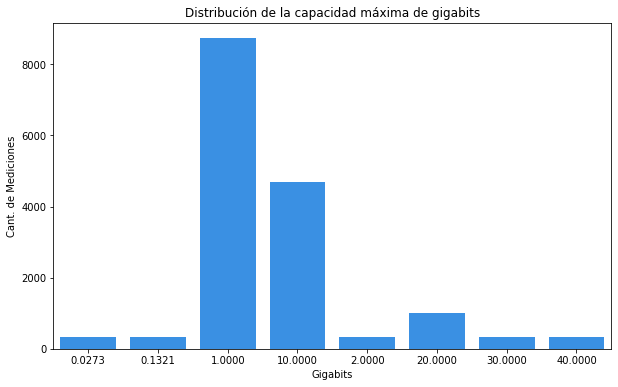

In [ ]:
plt.figure(figsize=(10,6))
sb.countplot(
    dataset.CAPACIDAD_MAXIMA_GBS.apply('{:,.4f}'.format), color='dodgerblue')
plt.title('Distribución de la capacidad máxima de gigabits')
plt.xlabel('Gigabits')
plt.ylabel('Cant. de Mediciones')
plt.show()

La variable `CAPACIDAD_MAXIMA_GBS` como se observa en el grafico anterior, es una varibale discreta. Estadisticos como la media o la desviacion estandar no aportan informacion relevante. Sin embargo la **media** nos dice que la mayoria las muestras pertenecen a dispositivos cuyos puertos tienen una capacidad `1 GBS` en primer lugar y `10 GBS` en segundo lugar.  

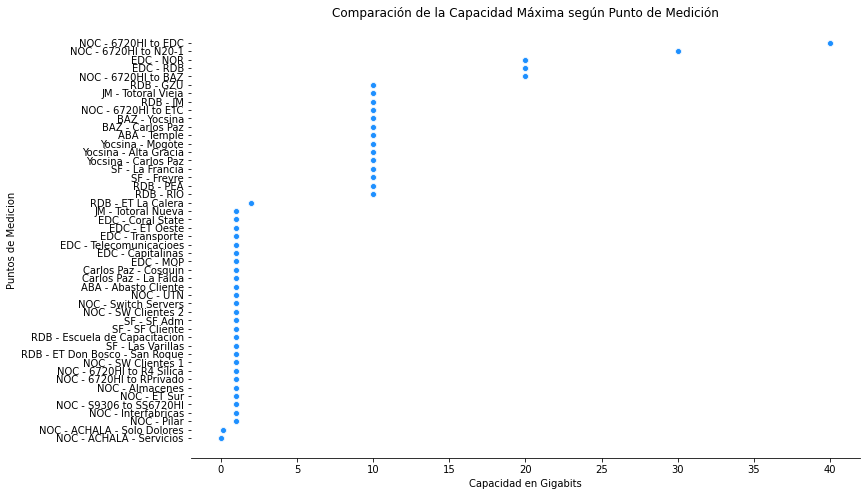

In [ ]:
plt.figure(figsize=(12,8))
sb.scatterplot(
    data=dataset.sort_values(by=['CAPACIDAD_MAXIMA_GBS']),
     x='CAPACIDAD_MAXIMA_GBS', y='PUNTO_MEDICION', color='dodgerblue')
plt.xlabel('Capacidad en Gigabits')
plt.ylabel('Puntos de Medicion')
plt.title('Comparación de la Capacidad Máxima según Punto de Medición')
sb.despine(left=True)
plt.show()

### 2.3 Seleccionar al menos 2 features del dataset:

Las features seleccionadas son `LATENCIA_MS` y `OUTBOUNDS_GBPS`

#### 2.3.1 ¿Hay valores faltantes?

Antes de detectar los outliers realizaremos un analisis sobre los valores faltantes de ambas variables

In [87]:
from IPython.display import display_html

# chequeo si hay nulos y si es así cuantos hay 
print("Cantidad de registros con el valor de LATENCIA_MS en nulo: \t", dataset.LATENCIA_MS.isnull().sum())
print("Cantidad de registros con el valor de OUTBOUND_GBPS en nulo: \t", dataset.OUTBOUND_GBPS.isnull().sum(), '\n')

# Buscamos en que puntos de medicion están los nulos 
ds_LATENCIA_MS = dataset[pd.isnull(dataset['LATENCIA_MS'])][['PUNTO_MEDICION','ID_EQUIPO']].groupby('PUNTO_MEDICION').agg(['count'])
ds_OUTBOUND_GBPS = dataset[pd.isnull(dataset['OUTBOUND_GBPS'])][['PUNTO_MEDICION','ID_EQUIPO']].groupby('PUNTO_MEDICION').agg(['count'])
ds_LATENCIA_MS_styler = ds_LATENCIA_MS.style.set_table_attributes("style='display:inline;padding-left:20px;'").set_caption('LATENCIA_MS NULOS')
ds_OUTBOUND_GBPS_styler = ds_OUTBOUND_GBPS.style.set_table_attributes("style='display:inline;'").set_caption('OUTBOUND_GBPS NULOS')
display_html(ds_LATENCIA_MS_styler._repr_html_()+ds_OUTBOUND_GBPS_styler._repr_html_(), raw=True)


Cantidad de registros con el valor de LATENCIA_MS en nulo: 	 48
Cantidad de registros con el valor de OUTBOUND_GBPS en nulo: 	 48 



,ID_EQUIPO
,count
PUNTO_MEDICION,
ABA - Abasto Cliente,1
ABA - Temple,1
BAZ - Carlos Paz,1
BAZ - Yocsina,1
Carlos Paz - Cosquin,1
Carlos Paz - La Falda,1
EDC - Capitalinas,1
EDC - Coral State,1


**NOTA:**    
**a)** Como tengo suficientes grados de libertad puedo quitar del análisis las filas que posean datos faltantes (nan) ya que aunque la base de datos se reduzca, me alcanzan los grados de libertad para los futuros análisis. El dataset actualmente tiene 32256 registros  

**b)** A continuación corroboraremos que las filas con datos faltantes sean las mismas en las dos variables con las que estamos trabajando.

**c)** Generamos un dataset sin valores nulos.

In [46]:
# Verificamos si los valores nulos pertenecen al mismo registro
# Generamosun nuevo dataset sin valores nulos
dataset_notna = dataset[pd.notnull(dataset['LATENCIA_MS'])]
print(dataset_notna.LATENCIA_MS.isnull().sum())
print(dataset_notna.OUTBOUND_GBPS.isnull().sum())
# Cantidad de registros del nuevo dataset
dataset_notna.shape

0
0


(16080, 11)

#### 2.3.2 ¿Existen outliers para estas features?

###### Latencia en Milisegundos

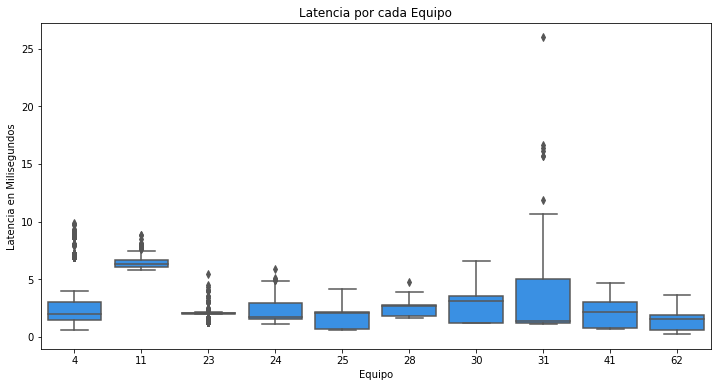

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot('111')
sb.boxplot(
    data=dataset_notna, x='ID_EQUIPO', y='LATENCIA_MS', 
    color='dodgerblue', ax=ax
)
ax.set_title("Latencia por cada Equipo")
ax.set_xlabel('Equipo')
ax.set_ylabel('Latencia en Milisegundos')
plt.show()

**NOTA:**   
En el primer gráfico podemos observar que cada Equipo tiene sus propios outliers, al analizar un equipo en particular observamos que los outliers de dicho equipo corresponden a dos Puntos de Medición específicos. Por lo tanto si eliminaramos los outliers en general o por Equipo estaríamos dejando afuera algunos Puntos de Medición; por lo cual se decide que la eliminación de outliers se realizará por Punto de Medición.  

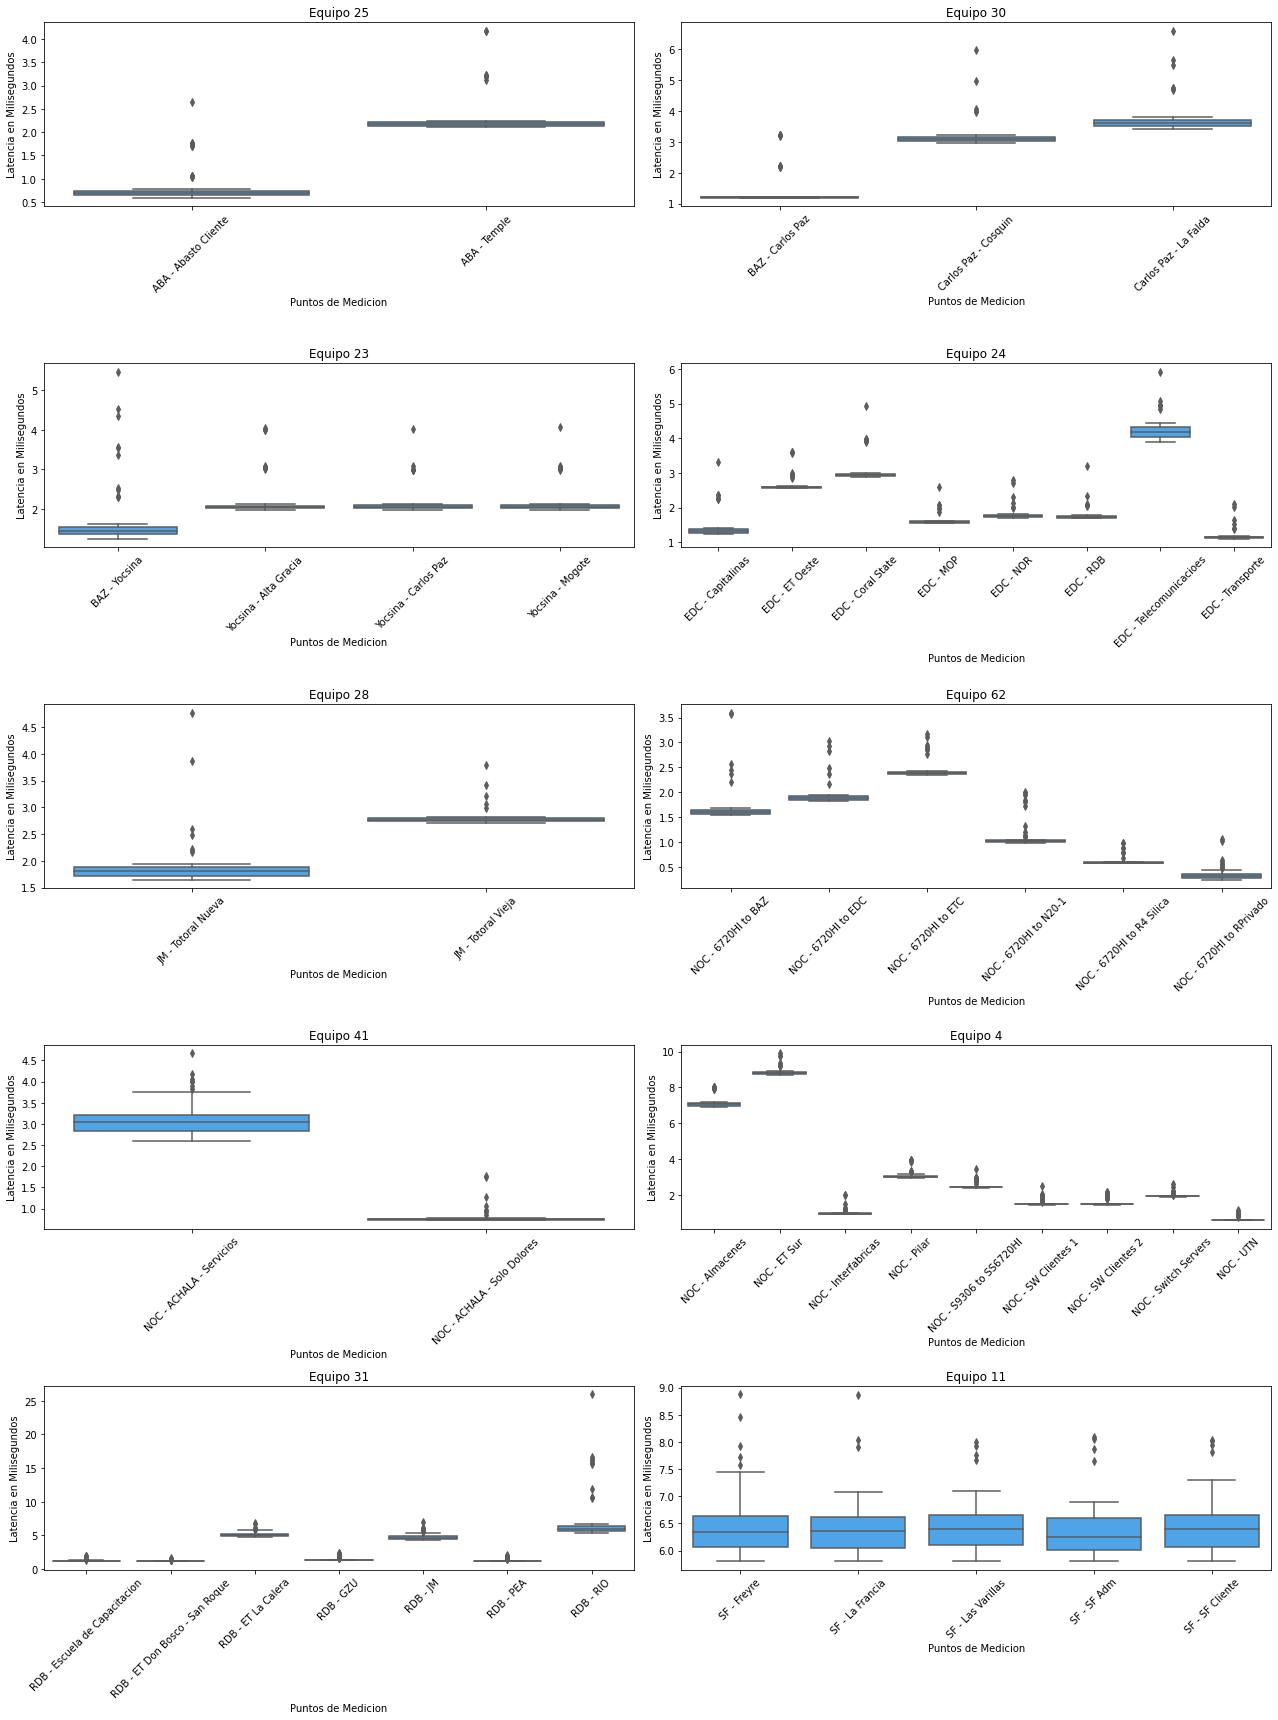

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(18, 24))
axs = axs.ravel()
ids = dataset.ID_EQUIPO.unique()
for i in range(len(ids)):
  sb.boxplot(x='PUNTO_MEDICION', y='LATENCIA_MS', 
             data=dataset_notna[dataset_notna.ID_EQUIPO == ids[i]], 
             ax=axs[i], color='#35A7FF')
  
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
  axs[i].set_xlabel('Puntos de Medicion')
  axs[i].set_ylabel('Latencia en Milisegundos')
  axs[i].set_title('Equipo {}'.format(ids[i]))

fig.tight_layout()
plt.show()

##### Tráfico de Salida en Gigabits

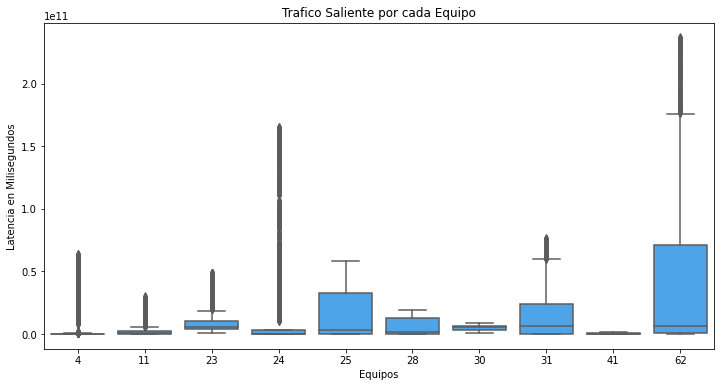

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot('111')
sb.boxplot(
    data=dataset_notna, x='ID_EQUIPO', y='OUTBOUND_GBPS', 
    color='#35A7FF', ax=ax
)
ax.set_title("Trafico Saliente por cada Equipo")
ax.set_xlabel('Equipos')
ax.set_ylabel('Latencia en Milisegundos')
plt.show()

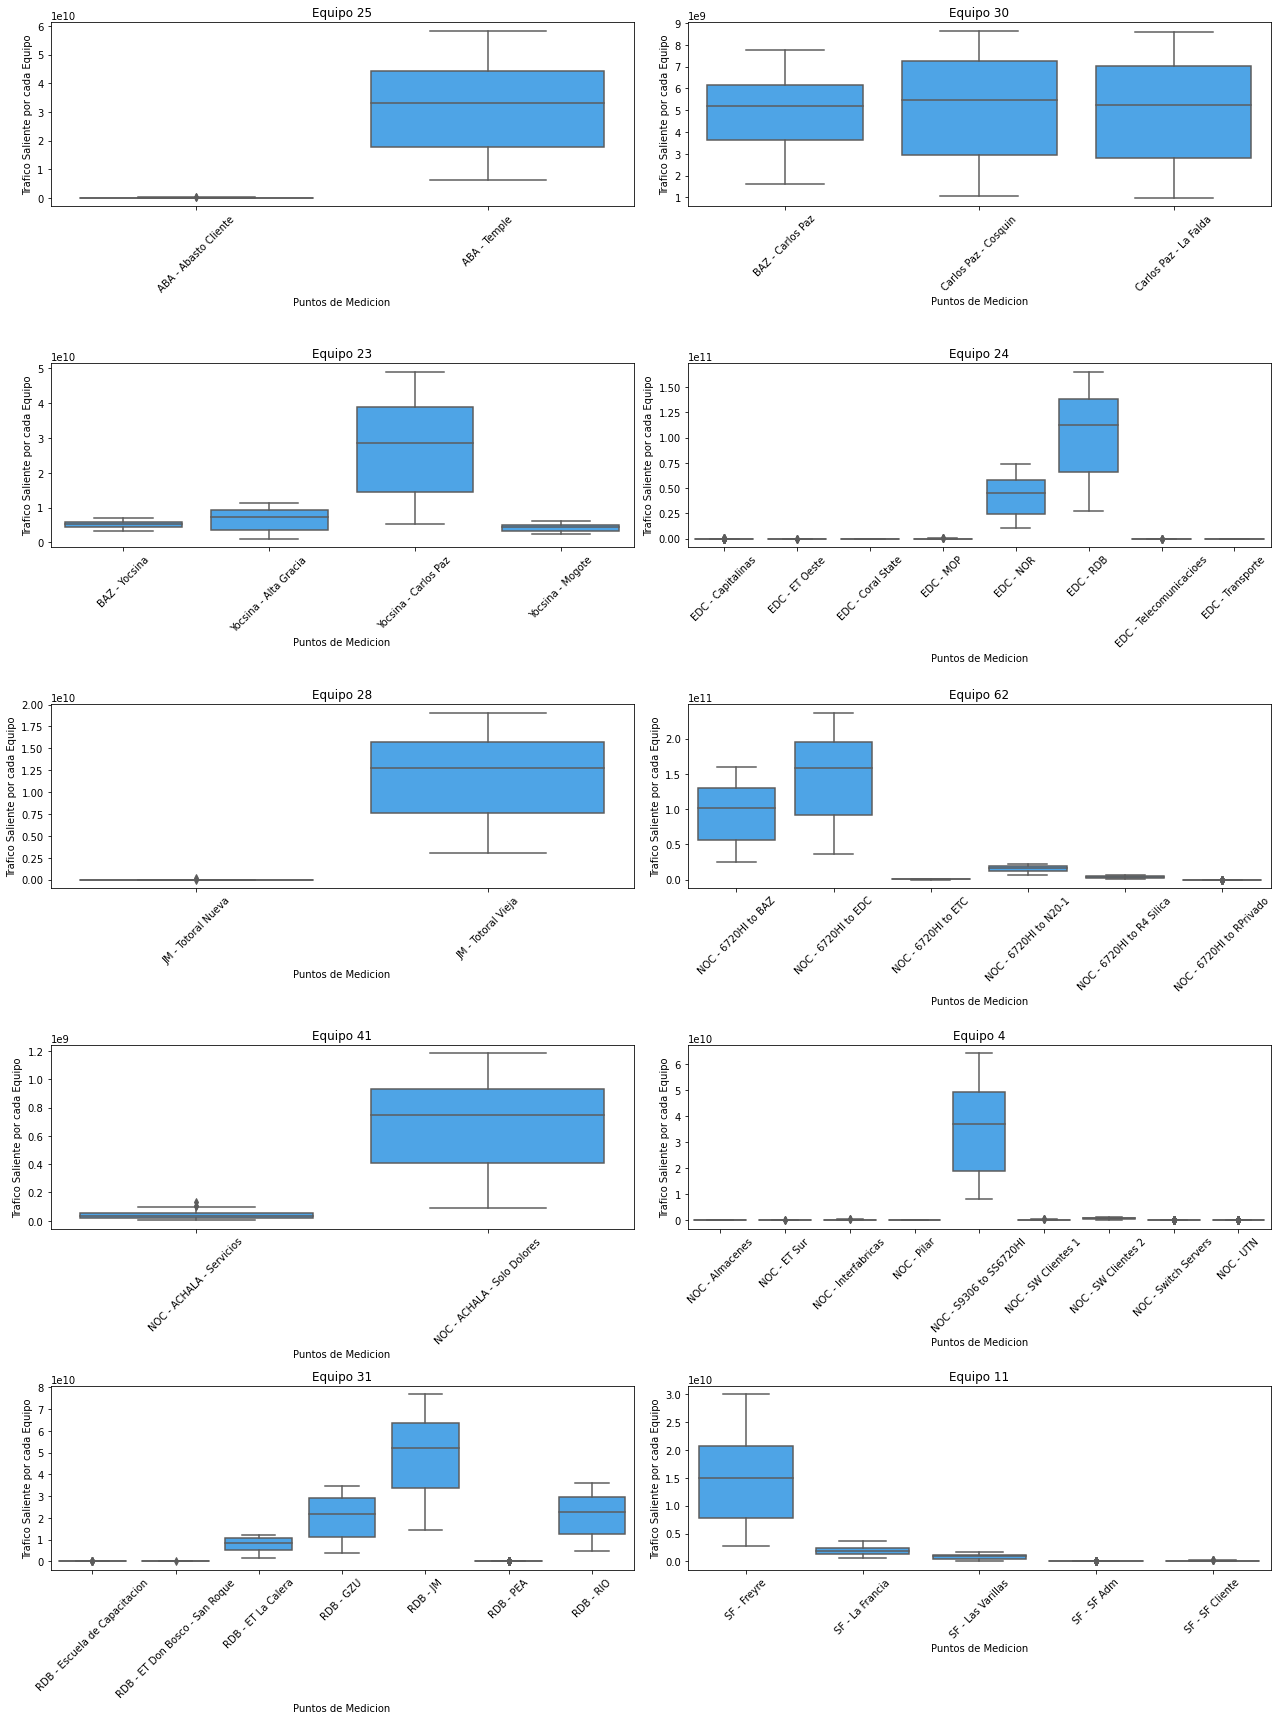

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(18, 24))
axs = axs.ravel()
ids = dataset.ID_EQUIPO.unique()
for i in range(len(ids)):
  sb.boxplot(x='PUNTO_MEDICION', y='OUTBOUND_GBPS', 
             data=dataset[dataset.ID_EQUIPO == ids[i]], ax=axs[i], color='#35A7FF')
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
  axs[i].set_xlabel('Puntos de Medicion')
  axs[i].set_ylabel('Trafico Saliente por cada Equipo')
  axs[i].set_title('Equipo {}'.format(ids[i]))

fig.tight_layout()
plt.show()

**NOTA:**   
El comportamiento con respecto a los outliers detectados en la feature latencia se vuelve a presentar en la feature Trafico de salida por lo cual se concluye en lo siguiente:

**a)** Utilizando un **boxplot** es posible graficar las distribuciones de las variables y ver si quedan valores sueltos (outliers) y si estos valores siguen algún ordenamiento.

**b)** Para que los outliers sean representativos se analizan por puntos de medición. Ya que cada punto de medición tiene su propio comportamiento tanto para la feature latencia como para tráfico de salida.  

**c)** Mediante un gráfico de cajas se pueden observar los outliers que en un grafico de barras quedarian dentro de la barra de desviación estandar.   

**d)** En este caso si se observan outliers para la feature Latencia en Milisegundo por Punto de Medición. Cuando analizamos la variable trafico de salida vemos que existen outliers pero su comportamiento nos refleja los picos que existen en la variable, podemos inducir que esto se debe a anomalias en el tráfico por lo tanto no serán filtrados    

**e)** Decidimos filtrar los outliers de ambas variables utilizando la fórmula que deja solo aquellos valores que se encuentran a 3 desviaciones estandares de la media.

##### Filtrado de outliers 

In [20]:
# Filtrado de outliers 
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    mask_var_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (3 * interesting_col.std()))
    return dataset[mask_var_outlier]

In [21]:
dataset_clean_aux = pd.DataFrame()
for point in dataset.PUNTO_MEDICION.unique():
  data_aux = clean_outliers(
      dataset_notna[dataset_notna.PUNTO_MEDICION == point], 'LATENCIA_MS')
  dataset_clean_aux = dataset_clean_aux.append(data_aux, ignore_index=True)

print("Filas removidas", len(dataset_notna) - len(dataset_clean_aux))

Filas removidas 286


In [22]:
dataset_clean = pd.DataFrame()
for point in dataset.PUNTO_MEDICION.unique():
  data_aux = clean_outliers(
      dataset_clean_aux[dataset_clean_aux.PUNTO_MEDICION == point], 
      'OUTBOUND_GBPS')
  dataset_clean = dataset_clean.append(data_aux, ignore_index=True)

print("Filas removidas", len(dataset_clean_aux) - len(dataset_clean))

Filas removidas 95


#### 2.3.3 ¿Hay valores negativos?

In [ ]:
cols = ['LATENCIA_MS', 'OUTBOUND_GBPS']
dataset_clean[cols].agg(['min', 'max'])

,LATENCIA_MS,OUTBOUND_GBPS
min,0.2504,47545.9922
max,25.9646,236952682496.0000


**NOTA:**   
Podemos observar que para ambas variables no se encuentran valores negativos en el dataset. 

#### 2.3.4 ¿Que decisión tomarían para completar o eliminar estos outliers y faltantes?

En las notas de los puntos 2.3.1, 2.3.2 y 2.3.3 se especifica las acciones aplicadas tendientes a contemplar los valores faltantes, los outliers y/o los valores negativos de cada feature analizada.

### 2.4 ¿Como se distribuyen las mediciones hechas por `ID_EQUIPO`? ¿Responden a alguna distribución conocida?

**Densidad de probabilidad de la variable discreta ID_EQUIPO Y LATENCIA**

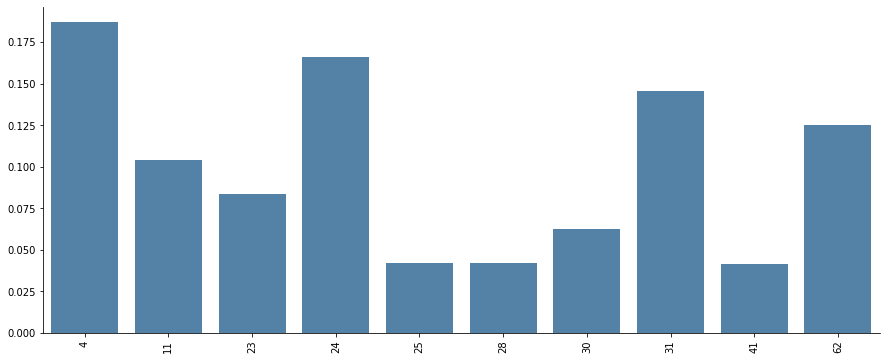

In [ ]:
plt.figure (figsize=(15,6))
plt1 = dataset_clean.ID_EQUIPO.value_counts(normalize=True)
sb.barplot(x=plt1.index, y=plt1.values, color='steelblue')
plt.xticks(rotation=90)
sb.despine()

**NOTA:**   
A priori notamos que todos los puntos de medición tienen la mismas cantidad de muestras. Por lo tanto podemos deducir que la cantidad de mediciones por equipo va a variar de acuerdo a la cantidad de puntos de medición que tenga el mismo. Entonces las cantidad de mediciones parece deterministica ya que depende de la cantidad de puntos de medición del equipo. El análisis de la distribución solicitado carecería de sentido.

Por ejemplo todos los puntos de medición tienen 336 muestras. Luego el equipo 4
tiene 9 puntos de medición y por otro lado el equipo 41 tiene 2 puntos de
medición. Claramente el equipo 4 tendrá mas mediciones que el dispositivo 41.
Entonces las cantidad de mediciones parece deterministica ya que depende de la
cantidad de puntos de medición del equipo

Entonces el analisis de la distribucion de la mediciones por `ID_EQUIPO` es 
deterministico, se realiza el analisis de la distribucion de `LATENCIA_MS` en 
su lugar 

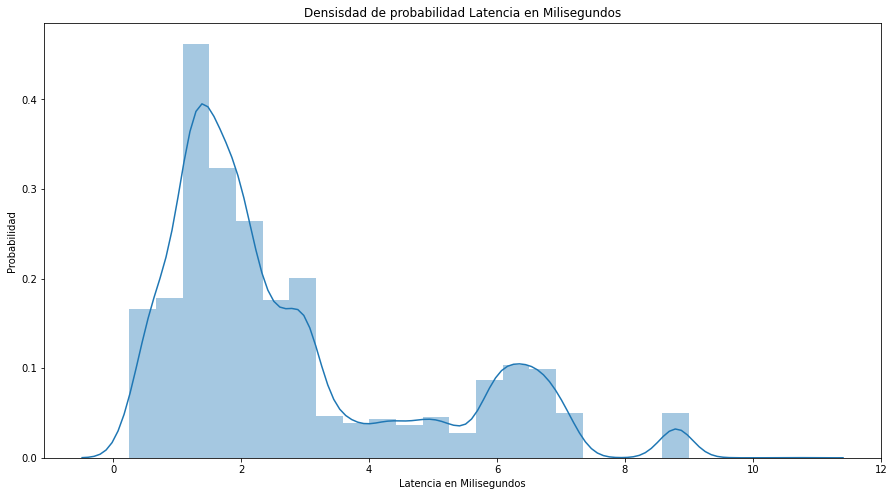

In [47]:
plt.figure(figsize=(15,8))
sb.distplot(dataset_clean.LATENCIA_MS, bins=25,
            kde=True, norm_hist=True)  
# Histograma con densidades
plt.xlabel('Latencia en Milisegundos')
plt.ylabel('Probabilidad')
plt.title('Densisdad de probabilidad Latencia en Milisegundos')
plt.show()

Para la feature `LATENCIA_MS` en base al grafico, no responden a ninguna distribicion conocida. Para confirmar se hace un analisis para la distribucion
`chi2`, en donde el `pvalue` es cercano a cero.  

In [51]:
parms = scipy.stats.chi2.fit(dataset_clean.LATENCIA_MS)
stats.kstest(dataset_clean.LATENCIA_MS,'chi2',args=parms)

KstestResult(statistic=0.09172380467984581, pvalue=9.079224814527444e-115)

### 2.5 Realizar un Análisis de Outliers (Valores Atípicos) de la variable `LATENCIA_MS`.

Como este analisis fue realizado en el punto 2.3, analizaremos los valores atipicos de la variable `PORCENTAJE_PACK_LOSS`

#### `PORCENTAJE_PACK_LOSS`

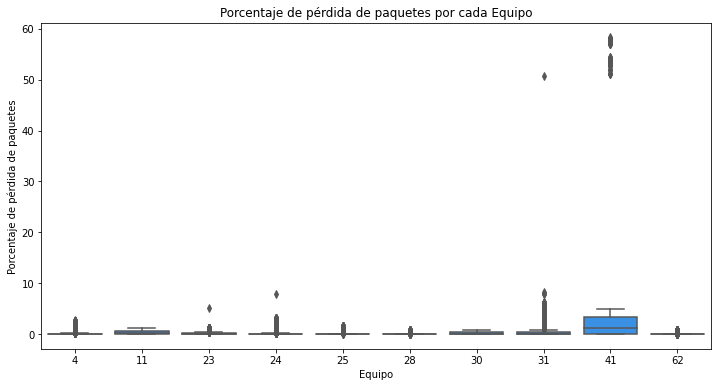

In [17]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot('111')
sb.boxplot(
    data=dataset_notna, x='ID_EQUIPO', y='PORCENTAJE_PACK_LOSS', 
    color='dodgerblue', ax=ax
)
ax.set_title("Porcentaje de pérdida de paquetes por cada Equipo")
ax.set_xlabel('Equipo')
ax.set_ylabel('Porcentaje de pérdida de paquetes')
plt.show()

En el primer gráfico podemos observar que cada Equipo tiene sus propios outliers, al analizar un equipo en particular observamos que los outliers de dicho equipo corresponden a dos Puntos de Medición específicos. Por lo tanto si eliminaramos los outliers en general o por Equipo estaríamos dejando afuera algunos Puntos de Medición; por lo cual se decide que la eliminación de outliers se realizará por Punto de Medición.

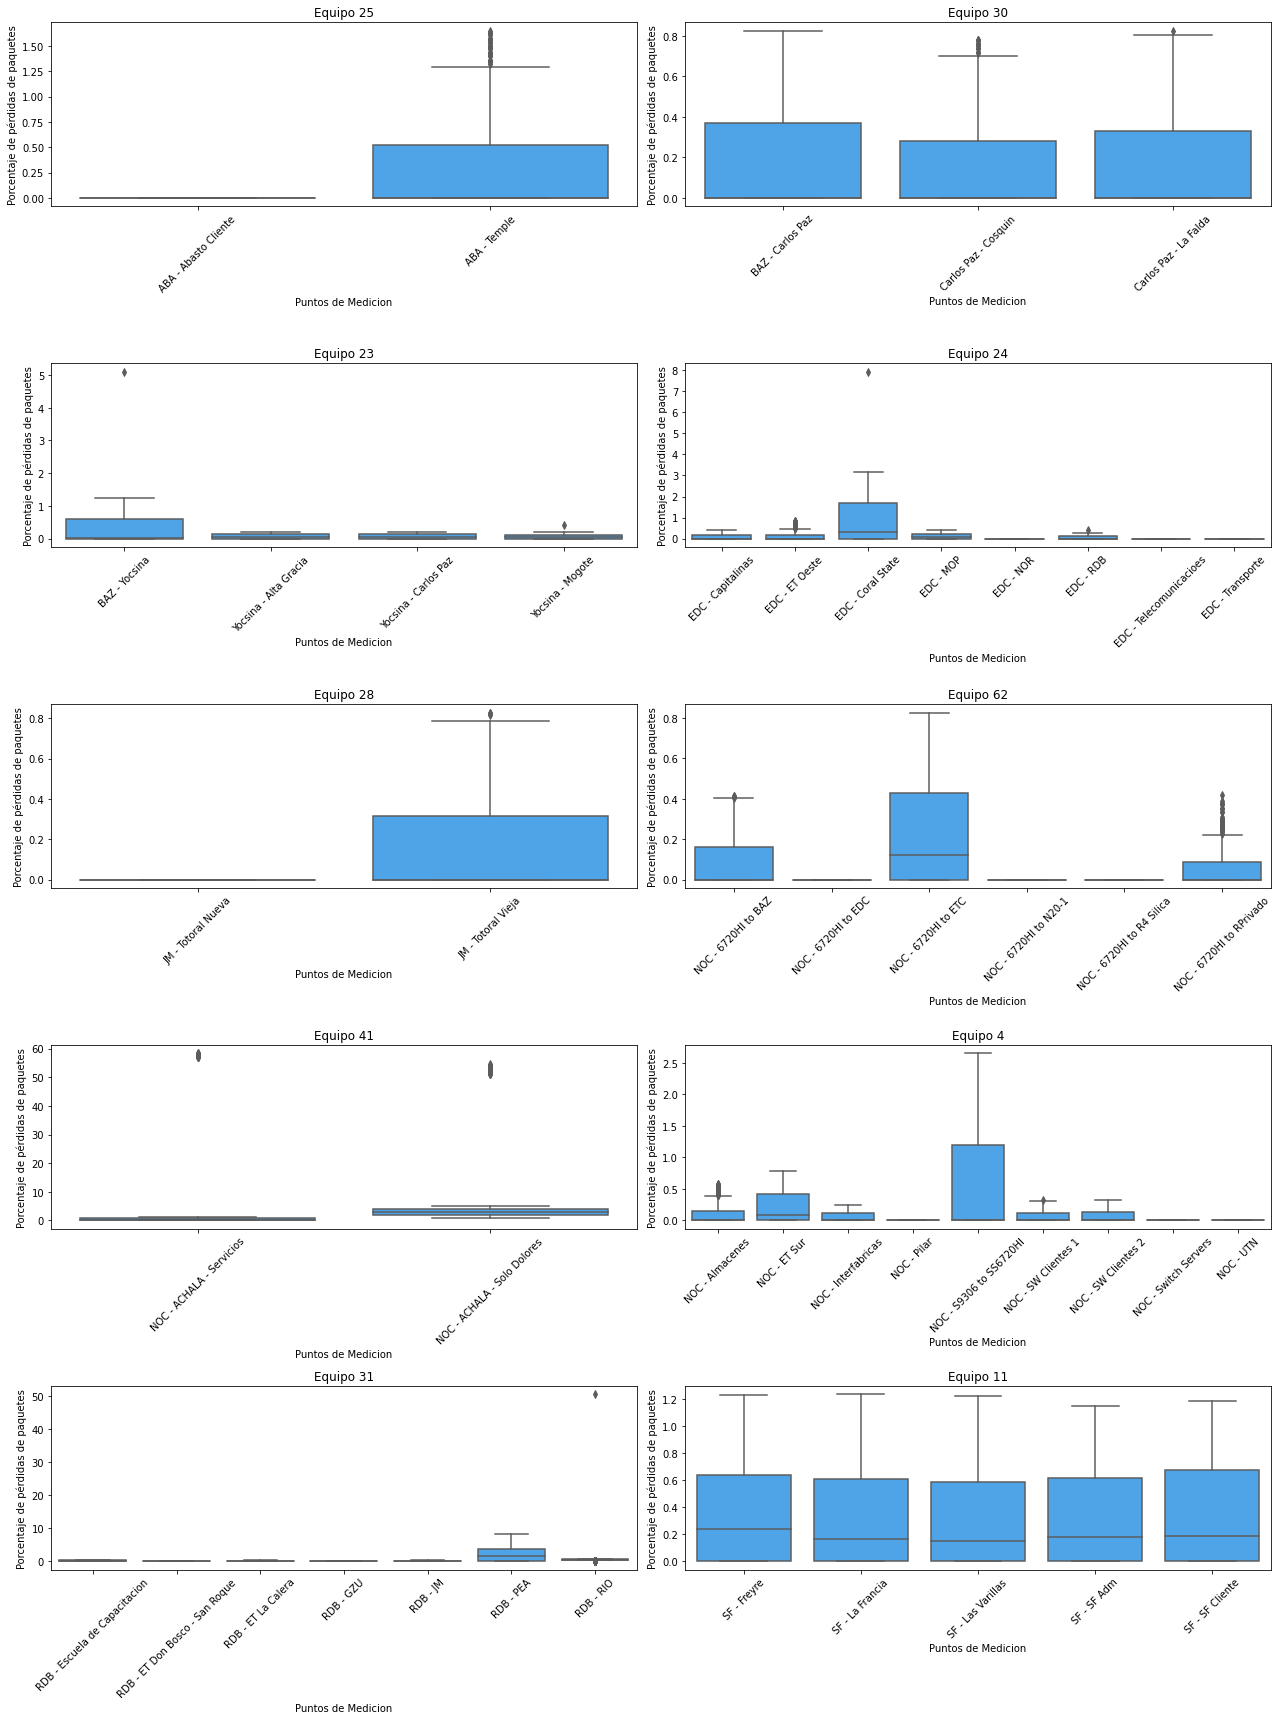

In [18]:
fig, axs = plt.subplots(5, 2, figsize=(18, 24))
axs = axs.ravel()
ids = dataset.ID_EQUIPO.unique()
for i in range(len(ids)):
  sb.boxplot(x='PUNTO_MEDICION', y='PORCENTAJE_PACK_LOSS', 
             data=dataset_notna[dataset_notna.ID_EQUIPO == ids[i]], 
             ax=axs[i], color='#35A7FF')
  
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
  axs[i].set_xlabel('Puntos de Medicion')
  axs[i].set_ylabel('Porcentaje de pérdidas de paquetes')
  axs[i].set_title('Equipo {}'.format(ids[i]))

fig.tight_layout()
plt.show()

Se llega a las siguientes conclusiones.

a) Utilizando un boxplot es posible graficar las distribuciones de las variables y ver si quedan valores sueltos (outliers) y si estos valores siguen algún ordenamiento.

b) Para que los outliers sean representativos se analizan por puntos de medición. Ya que cada punto de medición tiene su propio comportamiento.

c) Mediante un gráfico de cajas se pueden observar los outliers que en un grafico de barras quedarían dentro de la barra de desviación estandar.

d) En este caso si se observan outliers para la feature porcentaje de pérdidas de paquetes por Punto de Medición.

e) Decidimos filtrar los outliers utilizando la fórmula que deja solo aquellos valores que se encuentran a 3 desviaciones estandares de la media.

#### Filtrado de outliers 

In [24]:
dataset_loss = pd.DataFrame()
for point in dataset.PUNTO_MEDICION.unique():
  data_aux = clean_outliers(
      dataset_clean[dataset_clean.PUNTO_MEDICION == point], 'PORCENTAJE_PACK_LOSS')
  dataset_loss = dataset_loss.append(data_aux, ignore_index=True)

print("Filas removidas", len(dataset_clean) - len(dataset_loss))
dataset_clean = dataset_loss

Filas removidas 52


### 2.6 Seleccionar al menos 2 puntos de medicion feature *PUNTO_MEDICION* para realizar el análisis que se propone a continuación:

Los *puntos de medicion* seleccionados son los siguientes:
* ABA - Temple
* BAZ - Carlos Paz
* EDC - NOR
* NOC - 6720HI to BAZ.
* NOC - 6720HI to N20-1

#### 2.6.1 ¿Cómo se comporta el trafico de entrada/salida en dichos puntos de medición?

vER DE ANALIZAR TABMIEN EL CONJUNTO TOTAL

In [25]:
points = ['ABA - Temple', 
          'BAZ - Carlos Paz', 
          'EDC - NOR', 
          'NOC - 6720HI to BAZ',
          'NOC - 6720HI to N20-1']
dataset_select = dataset_clean[dataset_clean.PUNTO_MEDICION.isin(points)]

In [26]:
#Creamos nuevas columna spara analizar la distribucion horaria y por día
dataset_select['HORA'] = dataset_select['FECHA_HORA'].dt.hour
dataset_select['DIA'] = dataset_select['FECHA_HORA'].dt.dayofweek

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


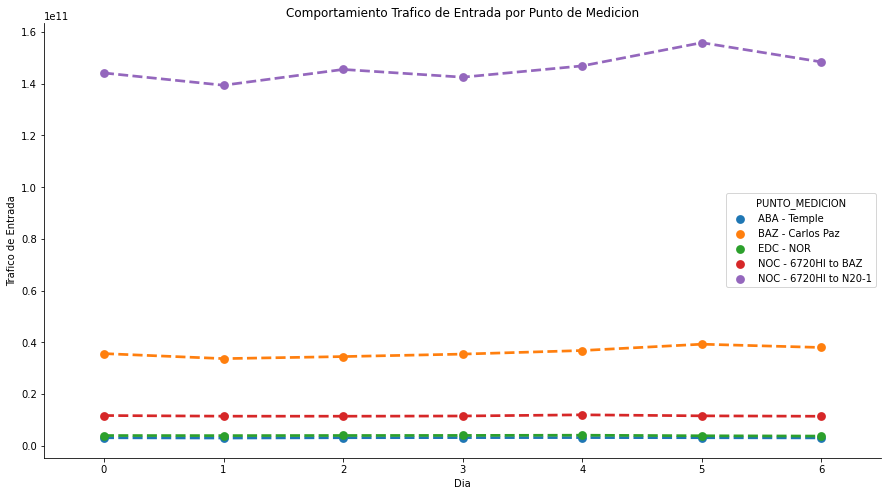

In [27]:
plt.figure(figsize=(15,8))
sb.pointplot(
    data=dataset_select, x='DIA', y='INBOUND_GBPS', hue='PUNTO_MEDICION', 
    estimator=np.mean, ci=None, linestyles='--', markers='o')

# plt.xticks(rotation=45)
plt.xlabel('Dia')
plt.ylabel('Trafico de Entrada')
plt.title('Comportamiento Trafico de Entrada por Punto de Medicion')
sb.despine()
plt.show()

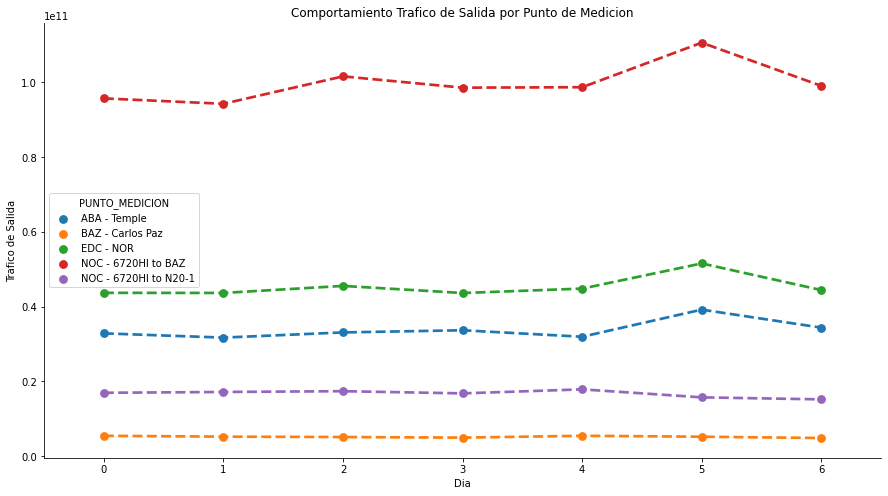

In [28]:
plt.figure(figsize=(15,8))

sb.pointplot(
    data=dataset_select, x='DIA', y='OUTBOUND_GBPS', hue='PUNTO_MEDICION', 
    estimator=np.median, ci=None, linestyles='--', markers='o')

plt.xlabel('Dia')
plt.ylabel('Trafico de Salida')
plt.title('Comportamiento Trafico de Salida por Punto de Medicion')
sb.despine()
plt.show()

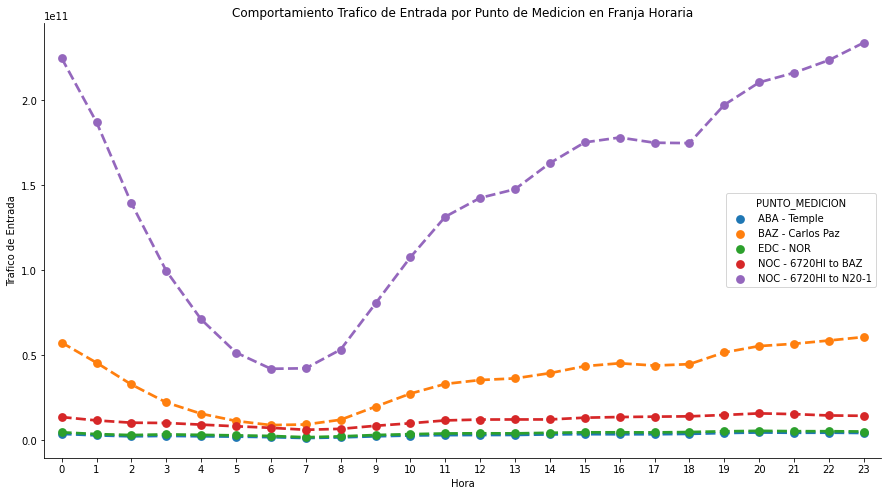

In [ ]:
plt.figure(figsize=(15,8))
sb.pointplot(
    data=dataset_select, x='HORA', y='INBOUND_GBPS', hue='PUNTO_MEDICION',
     estimator=np.median, ci=None, linestyles='--', markers='o')

plt.xlabel('Hora')
plt.ylabel('Trafico de Entrada')
plt.title('Comportamiento Trafico de Entrada por Punto de Medicion en Franja Horaria')
sb.despine()
plt.show()

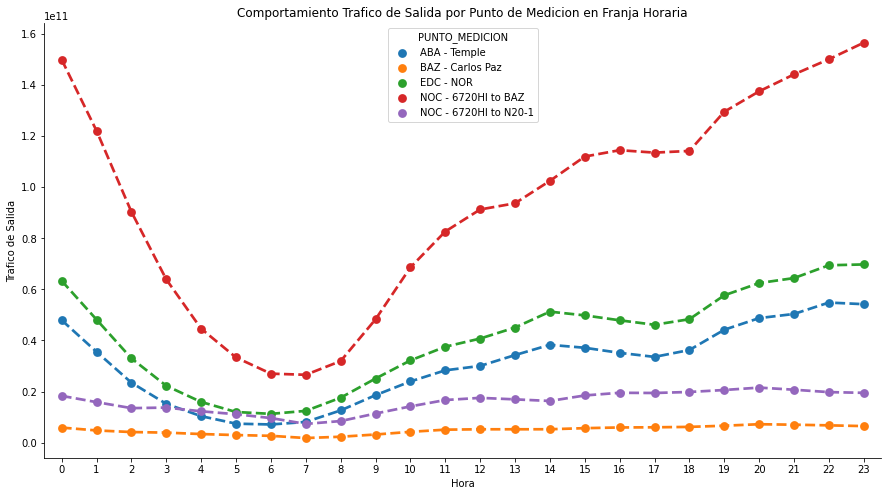

In [ ]:
plt.figure(figsize=(15,8))
sb.pointplot(
    data=dataset_select, x='HORA', y='OUTBOUND_GBPS', hue='PUNTO_MEDICION', 
    estimator=np.median, ci=None, linestyles='--', markers='o')

plt.xlabel('Hora')
plt.ylabel('Trafico de Salida')
plt.title('Comportamiento Trafico de Salida por Punto de Medicion en Franja Horaria')
sb.despine()
plt.show()

#### 2.6.2 ¿Qué relaciones observamos segun el dia o la hora?
    
**NOTA:** De acuerdo a los gráficos previos podemos inferir los siguientes comportamientos

**a)** Tanto en el tráfico de entrada y salida en el análisis por día de la semana observamos un leve incremento los sábados

**b)** En cuanto al analisis de los tráficos por franja horaria se detecta que en el rango de 4 am a 9 am hay una considerable disminución del uso de la red

### **Anexo**



### **3. Distribuciones**

#### 3.2 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si las variables INBOUND_GBPS y OUTBOUNDS_GBPS corresponden a la distribución normal. Realizar el ejercicio para cada uno de los puntos de medición seleccionados anteriormente





#### Analisis distribución

Se seleccionan 4 *puntos de medicion* :
* ABA - Temple
* BAZ - Carlos Paz
* EDC - NOR
* NOC - 6720HI to BAZ.
* NOC - 6720HI to N20-1

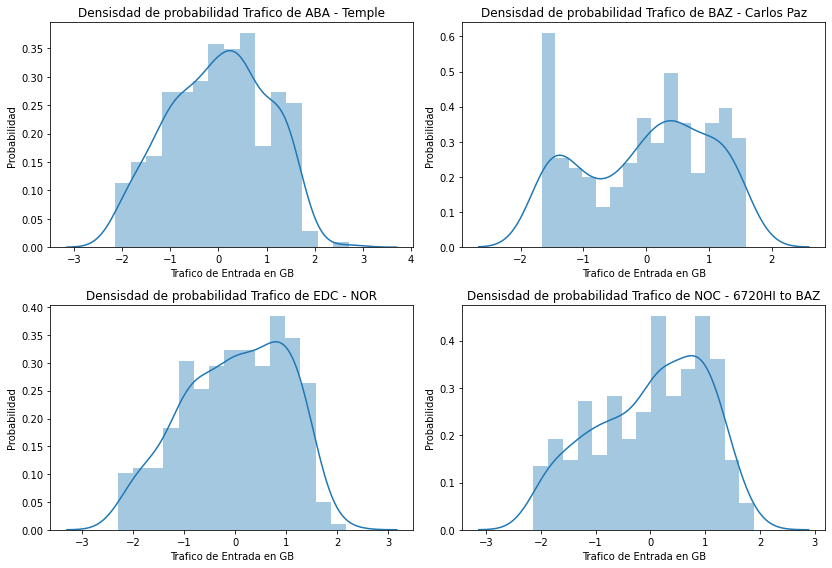

In [66]:
points = ['ABA - Temple', 'BAZ - Carlos Paz', 'EDC - NOR', 
          'NOC - 6720HI to BAZ']

cols = ['PUNTO_MEDICION', 'INBOUND_GBPS']
df = dataset_clean[cols]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i in range(len(points)):
  
  sb.distplot(
    (df[df.PUNTO_MEDICION == points[i]]['INBOUND_GBPS'] - \
    df[df.PUNTO_MEDICION == points[i]]['INBOUND_GBPS'].mean()) / \
    df[df.PUNTO_MEDICION == points[i]]['INBOUND_GBPS'].std(),
     bins=15, kde=True, norm_hist=False, ax=axs[i])
  
  axs[i].set_xlabel('Trafico de Entrada en GB')
  axs[i].set_ylabel('Probabilidad')
  axs[i].set_title('Densisdad de probabilidad Trafico de {}'.format(points[i]))

fig.tight_layout()
plt.show()


**NOTA:**   
A priori no podemos determinar la distribución de las variables LATENCIA_MS y INBOUND_GBPS, pero para esta última feature podríamos decir que su distribución de probabilidades "se asemeja" a una distribución normal


**Prueba de Hipotesis:**
1. PLANTEO DE HIPÓTESIS
  * Ho= distribución de la variable = normal
  * Hi = distribución de la variable != normal
   
2. ESTABLECIMIENTO DEL NIVEL DE SIGNIFICANCIA DEL TEST 
  * nivel de significancia (alfa)=0.05
  * nivel de confianza (1-alfa)=0.95

3. ELECCIÓN DEL TEST
  * Test de Kolmogorov-Smirnof -> contrasta la distribución de mi variable, con
  una distribución normal

14. REGLA DE DECISIÓN
  * p-valor < alfa = Rechazo Ho

In [80]:
points = ['ABA - Temple', 'BAZ - Carlos Paz', 'EDC - NOR', 
          'NOC - 6720HI to BAZ']
for point in points:
  ds1 = dataset_clean[dataset_clean.PUNTO_MEDICION == point].copy()
  
  # ######### Normalizacion ###########
  ds1['INBOUND_GBPS'] = (
      ds1['INBOUND_GBPS'] - ds1['INBOUND_GBPS'].mean()) / ds1['INBOUND_GBPS'].std()
  
  # ######### Estadisticos ###########
  media_ib, desviacion_ib = scipy.stats.norm.fit(ds1["INBOUND_GBPS"])
  media_ob, desviacion_ob = scipy.stats.norm.fit(ds1["OUTBOUND_GBPS"])

  print('ESTADISTICOS DESCRIPTIVOS DE LAS VARIABLES DE TRAFICO {}'.format(point))
  print('Hipotesis Nula INBOUND_GBPS es normal con Media = '+ str(media_ib) + ' Dev.Est. = '+ str(desviacion_ib))
  print('Hipotesis Nula OUTBOUND_GBPS es normal con Media = '+ str(media_ob) + ' Dev.Est. = '+ str(desviacion_ob))
  print('')

  d_ib, pvalor_ib = scipy.stats.kstest(
    ds1["INBOUND_GBPS"],"norm",args=(media_ib,desviacion_ib))

  d_ob, pvalor_ob = scipy.stats.kstest(
    ds1["OUTBOUND_GBPS"],"norm",args=(media_ob,desviacion_ob))

  # ######### Test ###########
  if pvalor_ib < 0.05:
    print("Se rechaza H0 porque INBOUND_GBPS No se ajusta a una normal, p-value=" + str(format(pvalor_ib)))
  else:
    print("No se rechaza H0 porque INBOUND_GBPS Se puede ajustar a una normal, p-value=" + str(format(pvalor_ib)))
    
  if pvalor_ob < 0.05:
     print("Se rechaza H0 porque OUTBOUND_GBPS No se ajusta a una normal, p-value=" + str(format(pvalor_ob, '.8f')))
  else:
    print("No se rechaza H0 porque OUTBOUND_GBPS Se puede ajustar a una normal, p-value=" + str(format(pvalor_ob, '.8f')))
  
  print('\n\n')

ESTADISTICOS DESCRIPTIVOS DE LAS VARIABLES DE TRAFICO ABA - Temple
Hipotesis Nula INBOUND_GBPS es normal con Media = 1.0831444142684454e-17 Dev.Est. = 0.9984744460987447
Hipotesis Nula OUTBOUND_GBPS es normal con Media = 31258449075.512196 Dev.Est. = 15254427583.25333

No se rechaza H0 porque INBOUND_GBPS Se puede ajustar a una normal, p-value=0.3733299980075022
Se rechaza H0 porque OUTBOUND_GBPS No se ajusta a una normal, p-value=0.02519704



ESTADISTICOS DESCRIPTIVOS DE LAS VARIABLES DE TRAFICO BAZ - Carlos Paz
Hipotesis Nula INBOUND_GBPS es normal con Media = 2.1862853408003083e-17 Dev.Est. = 0.9984603532054124
Hipotesis Nula OUTBOUND_GBPS es normal con Media = 4916867725.7846155 Dev.Est. = 1564672313.2047212

Se rechaza H0 porque INBOUND_GBPS No se ajusta a una normal, p-value=0.010667386510342663
Se rechaza H0 porque OUTBOUND_GBPS No se ajusta a una normal, p-value=0.01632810



ESTADISTICOS DESCRIPTIVOS DE LAS VARIABLES DE TRAFICO EDC - NOR
Hipotesis Nula INBOUND_GBPS es normal 

**NOTA:** En los cuatro puntos de medición analizados podemos observar que la distribución de las variables de trafico de entrada y salida no se ajusta a la normal en la mayoría de los casos.

### **4. Correlaciones**

#### 4.1 Graficar la correlación entre las variables Latencia en Milisegundos y Porcentaje de Paquetes Perdidos para analizar si existe un comportamiento vinculado

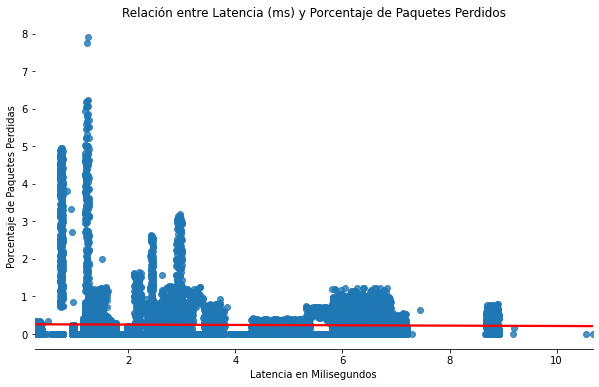

In [42]:
plt.figure(figsize=(10,6))
sb.regplot(data=dataset_clean, x='LATENCIA_MS', y='PORCENTAJE_PACK_LOSS',
           line_kws={"color": "red"})
plt.ylabel('Porcentaje de Paquetes Perdidas')
plt.xlabel('Latencia en Milisegundos')
plt.title('Relación entre Latencia (ms) y Porcentaje de Paquetes Perdidos')
sb.despine(left=True)
plt.show()

**NOTA:** Visualmente no podemos inferir que existe correlación entre ambas 

#### 4.2 Calcular algún coeficiente de correlación adecuado entre los los pares de variables mencionados en el punto anterior. 
Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 


**Coeficiente de Spearman (rho)**

 * Ho -> Las variables son independientes, no hay correlación
 * nivel de significancia (alfa)=0.05
 * p-valor < alfa = Rechazo Ho

In [62]:
coef_rho, p_value_rho = scipy.stats.spearmanr(
    dataset_clean['INBOUND_GBPS'], dataset_clean['OUTBOUND_GBPS'])

print('pf_identity Vs. pf_score-> coef_rho= ',coef_rho)
print('pf_identity Vs. pf_score-> p-value= %.5f'% p_value_rho)

pf_identity Vs. pf_score-> coef_rho=  0.9148363660029664
pf_identity Vs. pf_score-> p-value= 0.00000


**NOTA:**  Calculando el Coeficiente de Spearman obtenemos;   
**a)** Existe correlacion entre las features trafico de entrada y trafico de salida, este era el resultado esperado dada la naturaleza de las variables

#### 4.3 correlación entre `INBOUND_GBPS` y `OUTBOUND_GBPS`

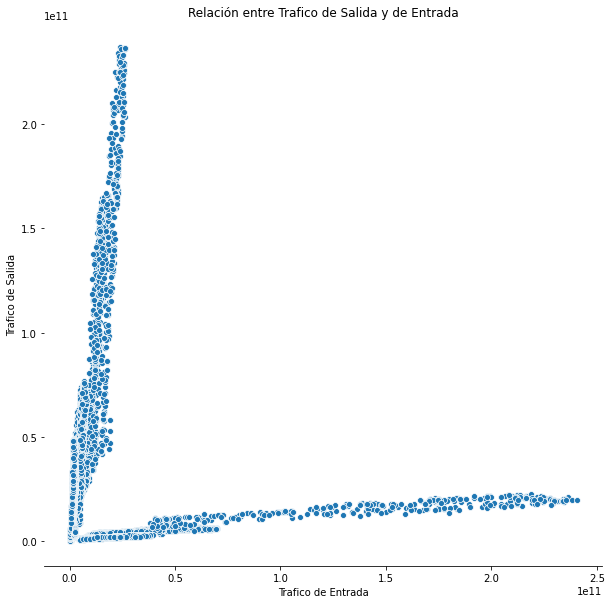

In [98]:
plt.figure(figsize=(10, 10))
sb.scatterplot(data=dataset_clean,
                    x='INBOUND_GBPS',
                    y='OUTBOUND_GBPS')
plt.ylabel('Trafico de Salida')
plt.xlabel('Trafico de Entrada')
plt.title('Relación entre Trafico de Salida y de Entrada')
sb.despine(left=True)
plt.show()

Si bien se esperaba encontrar una correlacion lineal entre las dos features
en el grafico anterior so observan dos grupos bien distinguidos.

A continuacion se procede a dividir eso grupos por **puntos de medicion** 

In [89]:
def estimate_params(X_y, X_e):
    """Caculates the value of a using all the examples."""
    num = np.mean(X_y)*np.mean(X_e) - np.mean(np.multiply(X_y, X_e))
    denom = np.mean(X_y)**2 - np.mean(np.multiply(X_y, X_y))
    a = num / denom
    b = np.mean(X_e) - a * np.mean(X_y)
    return a, b

def linear_regression(x_y, a, b):
  return a * x_y + b

def build_regressions(data, x_var='year', y_var='pf_score'):
    records = []
    for code in data.PUNTO_MEDICION.unique():
        record = [code]
        y_data = data[data.PUNTO_MEDICION == code][y_var].dropna()
        # Comprobamos que hay datos en el intervalo
        if len(y_data) <= 1:
            continue
        x_data = data[(data.PUNTO_MEDICION == code) &
                      (data[y_var].notnull())][x_var].dropna()
        # Estimamos los parámetros
        a, b = estimate_params(x_data, y_data)
        # Calculamos el error cuadrático medio de la regresión lineal estimada
        predictions = np.apply_along_axis(
            lambda x: linear_regression(x, a, b), 0, x_data)
        mse = np.mean(np.power(predictions - y_data, 2))
        record.extend([a, b, mse])
        # Agregamos el registro
        records.append(record)
    return pd.DataFrame.from_records(
        records, columns=['PUNTO_MEDICION', 'slope', 'bias', 'mse']
    )

<Figure size 720x432 with 0 Axes>

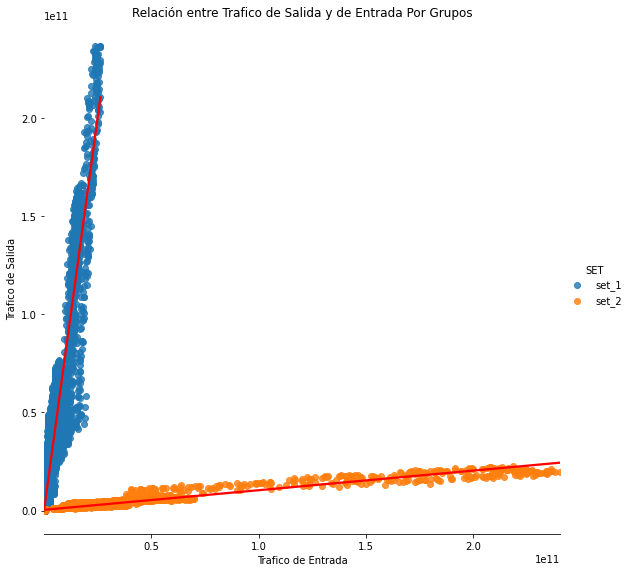

In [100]:
plt.figure(figsize=(10,6))
sb.lmplot(data=dataset_clean, x='INBOUND_GBPS', y='OUTBOUND_GBPS',
           hue='SET', height=8 , fit_reg=True,  line_kws={"color": "red"})

plt.ylabel('Trafico de Salida')
plt.xlabel('Trafico de Entrada')
plt.title('Relación entre Trafico de Salida y de Entrada Por Grupos')
sb.despine(left=True)
plt.show()

In [106]:
print('PUNTO_MEDICION Set 1')
print(dataset_clean[dataset_clean.SET == 'set_1'].PUNTO_MEDICION.unique())
print()
print('PUNTO_MEDICION Set 2')
print(dataset_clean[dataset_clean.SET == 'set_2'].PUNTO_MEDICION.unique())

PUNTO_MEDICION Set 1
['ABA - Abasto Cliente' 'ABA - Temple' 'Carlos Paz - Cosquin'
 'Carlos Paz - La Falda' 'EDC - ET Oeste' 'EDC - Coral State' 'EDC - NOR'
 'EDC - RDB' 'EDC - Telecomunicacioes' 'EDC - Transporte'
 'JM - Totoral Nueva' 'JM - Totoral Vieja' 'NOC - 6720HI to BAZ'
 'NOC - 6720HI to EDC' 'NOC - 6720HI to ETC' 'NOC - 6720HI to R4 Silica'
 'NOC - ACHALA - Servicios' 'NOC - ACHALA - Solo Dolores'
 'NOC - Almacenes' 'NOC - ET Sur' 'NOC - Pilar' 'NOC - S9306 to SS6720HI'
 'NOC - SW Clientes 1' 'NOC - SW Clientes 2' 'NOC - UTN'
 'RDB - ET Don Bosco - San Roque' 'RDB - ET La Calera' 'RDB - GZU'
 'RDB - JM' 'RDB - PEA' 'RDB - RIO' 'SF - Freyre' 'SF - Las Varillas'
 'SF - SF Adm' 'SF - SF Cliente' 'Yocsina - Alta Gracia'
 'Yocsina - Carlos Paz' 'Yocsina - Mogote']

PUNTO_MEDICION Set 2
['BAZ - Carlos Paz' 'BAZ - Yocsina' 'EDC - Capitalinas' 'EDC - MOP'
 'NOC - 6720HI to N20-1' 'NOC - 6720HI to RPrivado' 'NOC - Interfabricas'
 'NOC - Switch Servers' 'RDB - Escuela de Capacitacion' 

**NOTA:**  En estos gráficos no solo podemos ver que existe relación entre ambas variables sino que además existen dos grupos de puntos de medición correlacionados (trafico de entrada y salida)